# YOLO Detection Workflow on Training and Validation Sets

### Counting detections per image and assessing YOLO performance

This notebook performs the following tasks:

- Run YOLO on all images in the training folder  
- Run YOLO on all images in the validation folder  
- Count the number of detections per image  
- Store results in separate DataFrames for training and validation sets  
- Assess detection performance and visualize detection counts


In [ ]:
# Imports and environment setup for YOLO dataset creation and image processing

import numpy as np  # Numerical computations
import os  # File and directory operations
import glob  # File pattern matching
from skimage.io import imread  # Reading images
from skimage import transform  # Image transformations like resizing
import matplotlib.pyplot as plt  # Plotting and visualization
import cv2  # OpenCV (commented out)
from PIL import Image  # Image handling
from tifffile import imwrite  # Writing TIFF files
from pathlib import Path  # Path handling
from skimage.filters import threshold_otsu  # Thresholding for segmentation
import shutil  # File operations like copy/move
from skimage.measure import regionprops  # Region properties for segmentation
from scipy.spatial import distance  # Distance calculations
import pandas as pd  # Data handling and analysis
import torch  # PyTorch for model handling
from ultralytics import YOLO  # YOLO object detection

# Pandas display options for debugging and visualization
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Auto-adjust width
pd.set_option('display.max_colwidth', None)  # Show full column width


In [98]:
model = YOLO("runs/detect/train62/weights/best.pt")


tensor([0.3906, 0.3811, 0.2405], device='cuda:0')


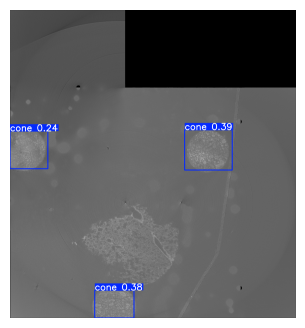

In [ ]:
# Run YOLO model prediction on a single image and visualize results

results = model.predict("/pn_local/2_1/final/full_stack/final_full_stack0001.tif", conf=0.1)

for i, r in enumerate(results):
    # Get the confidence scores of all detected boxes
    confidences = r.boxes.conf
    print(confidences)
    
    # Visualize the detection results
    im_bgr = r.plot()  # Plot detections on image (BGR format)
    im_rgb = Image.fromarray(im_bgr[..., ::-1])  # Convert BGR to RGB for display
    
    plt.figure(figsize=(4, 4))
    plt.imshow(im_rgb)
    plt.axis('off')  # Hide axes
    plt.show()


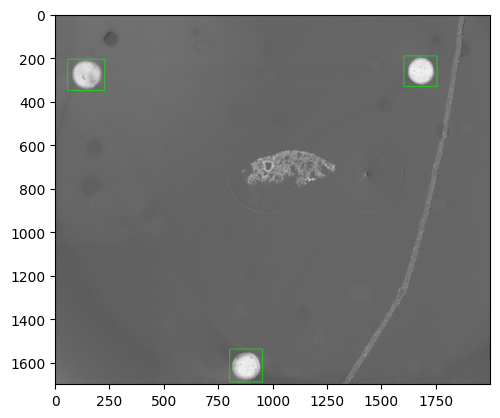

In [ ]:
# Load annotations done 

def draw_yolo_bboxes(image_path, annotation_path):
    """
    Loads an image and its YOLO annotation file, converts relative bounding box coordinates
    to absolute pixel coordinates, draws bounding boxes on the image, and displays it.
    """
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error loading image {image_path}")
        return

    image_height, image_width, _ = image.shape

    # Read YOLO annotation file
    with open(annotation_path, 'r') as file:
        lines = file.readlines()

    for line in lines:
        class_id, x_center_rel, y_center_rel, width_rel, height_rel = map(float, line.strip().split())

        # Convert relative coordinates to absolute pixel values
        x_center = int(x_center_rel * image_width)
        y_center = int(y_center_rel * image_height)
        box_width = int(width_rel * image_width)
        box_height = int(height_rel * image_height)

        # Calculate top-left and bottom-right corners
        top_left_x = int(x_center - box_width / 2)
        top_left_y = int(y_center - box_height / 2)
        bottom_right_x = int(x_center + box_width / 2)
        bottom_right_y = int(y_center + box_height / 2)

        # Draw rectangle on image
        cv2.rectangle(image, (top_left_x, top_left_y), (bottom_right_x, bottom_right_y), (0, 255, 0), 2)
    
    # Display image
    plt.figure(figsize=(6,6))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()


# Example usage
image_path = '/pn_local/2_1/yolo_dataset/train_folder/final_full_stack2092.tif'
annotation_path = '/pn_local/2_1/yolo_dataset/train_folder/final_full_stack2092.txt'

draw_yolo_bboxes(image_path, annotation_path)


tensor([0.4715, 0.4578, 0.4410], device='cuda:0')


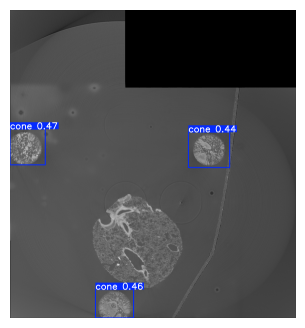

tensor([0.4649, 0.4575, 0.4355], device='cuda:0')


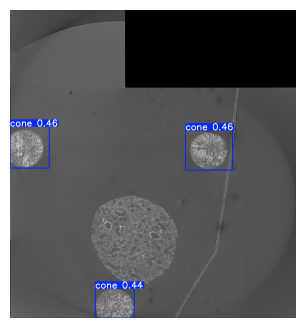

tensor([0.4115, 0.4112, 0.3912], device='cuda:0')


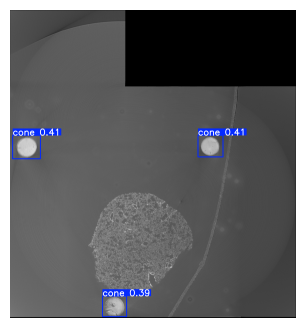

tensor([0.4522, 0.4219, 0.4062], device='cuda:0')


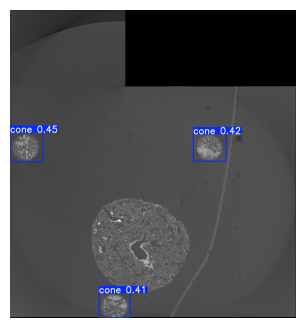

tensor([0.4227, 0.3987, 0.3981], device='cuda:0')


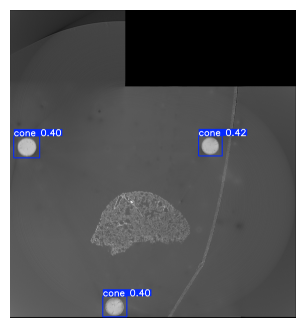

tensor([0.4535, 0.4464, 0.4387], device='cuda:0')


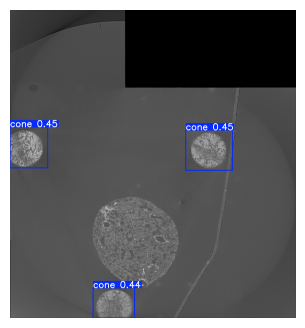

tensor([0.4652, 0.4617, 0.4565], device='cuda:0')


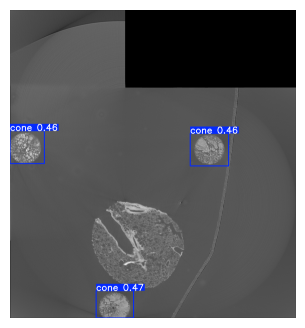

tensor([0.4622, 0.4564, 0.4307], device='cuda:0')


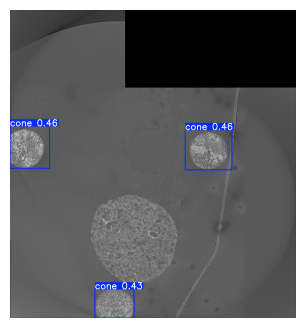

tensor([0.4549, 0.4372, 0.4177], device='cuda:0')


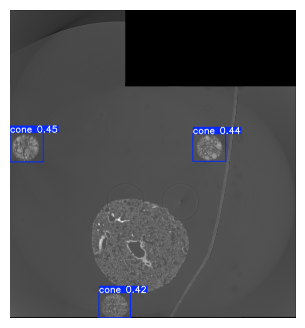

tensor([0.4713, 0.4529, 0.4298], device='cuda:0')


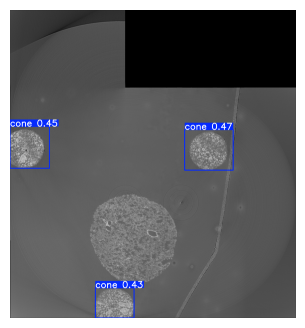

tensor([0.4405, 0.4338, 0.4030], device='cuda:0')


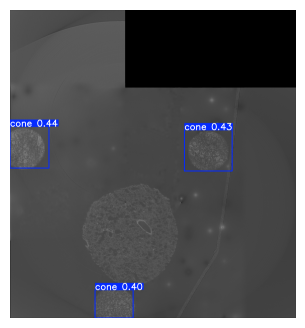

tensor([0.4578, 0.4505, 0.4256], device='cuda:0')


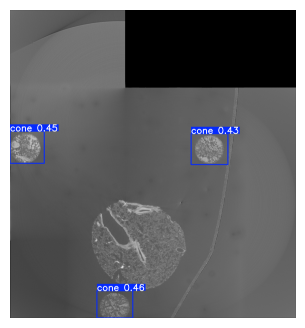

tensor([0.3892, 0.3881, 0.3763], device='cuda:0')


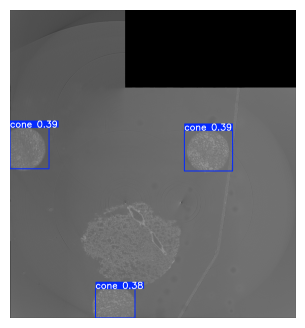

tensor([0.4381, 0.4278, 0.4228], device='cuda:0')


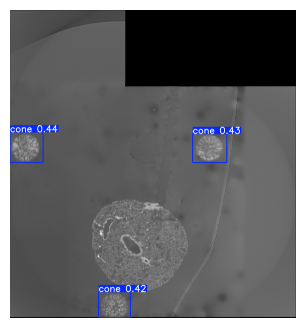

tensor([0.4535, 0.4437, 0.4105], device='cuda:0')


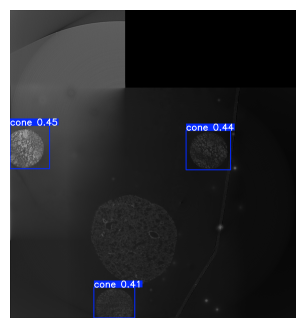

tensor([0.4564, 0.4480, 0.4347], device='cuda:0')


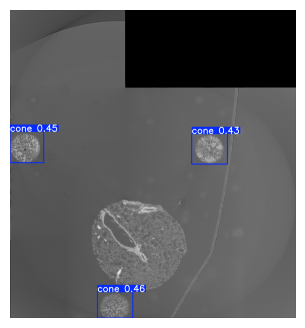

tensor([0.4663, 0.4595, 0.4156], device='cuda:0')


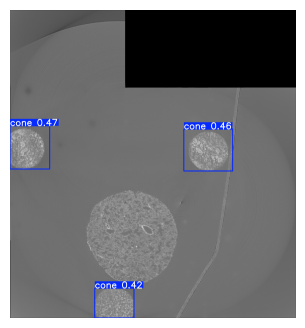

tensor([0.4697, 0.4589, 0.4528], device='cuda:0')


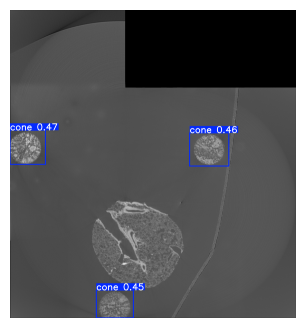

tensor([0.4416, 0.4309, 0.4122], device='cuda:0')


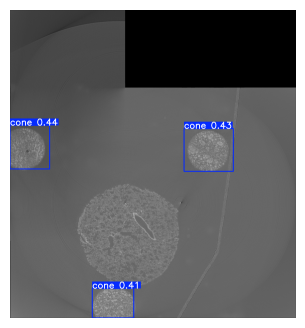

tensor([0.4757, 0.4659, 0.4164], device='cuda:0')


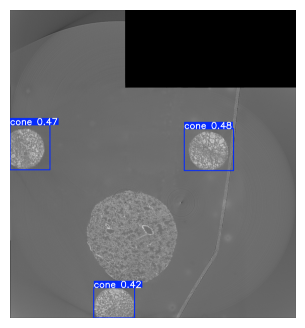

tensor([0.4517, 0.4429, 0.4339], device='cuda:0')


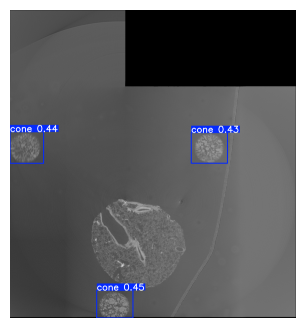

tensor([0.4462, 0.4237, 0.4095], device='cuda:0')


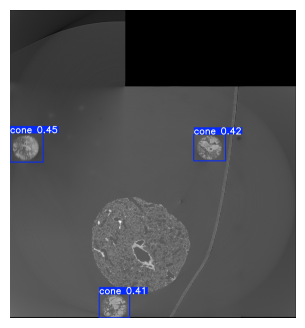

tensor([0.4157, 0.3958, 0.3936], device='cuda:0')


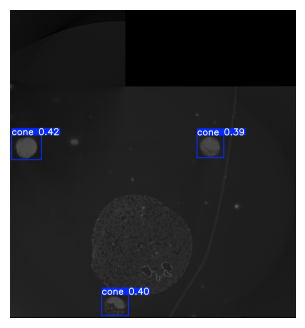

tensor([0.4321, 0.4000, 0.3940], device='cuda:0')


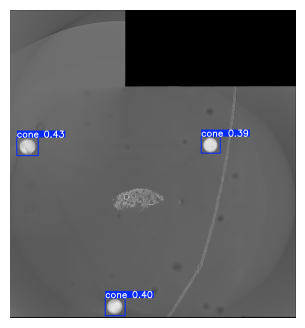

tensor([0.4440, 0.4407, 0.4303], device='cuda:0')


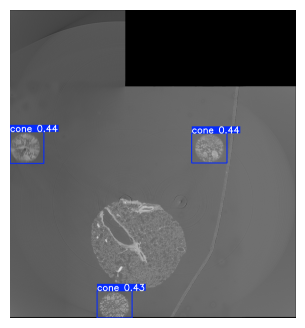

tensor([0.4434, 0.4296, 0.4140], device='cuda:0')


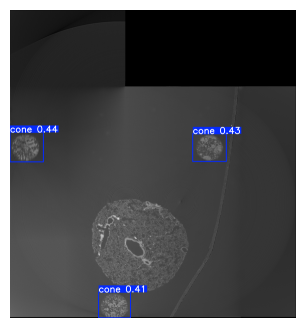

tensor([0.4742, 0.4489, 0.4396], device='cuda:0')


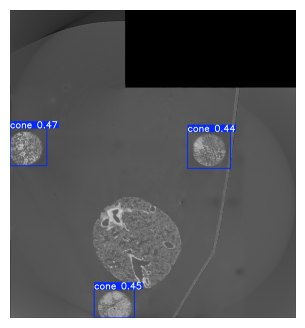

tensor([0.4482, 0.4364, 0.4280], device='cuda:0')


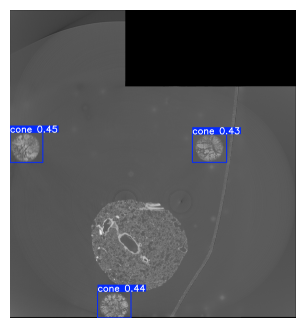

tensor([0.4541, 0.4532, 0.4015], device='cuda:0')


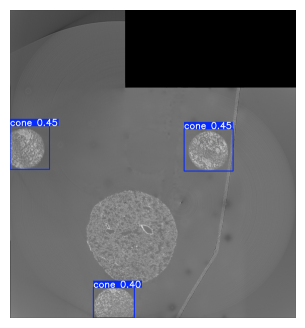

tensor([0.4530, 0.4202, 0.3932], device='cuda:0')


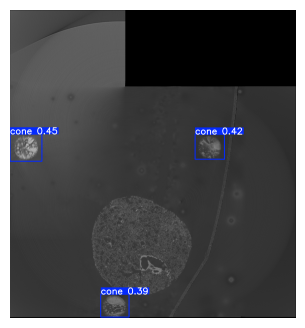

In [ ]:
# 30 first images in a TIFF stack using a YOLO model:
# it predicts object detections, prints confidence values, stores the total number 
# of detections per image in a DataFrame, and visualizes the bounding boxes on each image.

# Initialize DataFrame
df_detect = pd.DataFrame(columns=["image_file", "total_detections"])

# Confidence threshold for YOLO predictions
confidence_threshold = 0.5

# Get list of TIFF files
tif_files = glob.glob(os.path.join("final/full_stack/", '*.tif'))

# Iterate through first 30 images
for file_path in tif_files[:30]:
    results = model.predict(file_path, conf=0.3)
    
    for r in results:
        # Extract confidences of detected boxes
        confidences = r.boxes.conf
        print(confidences)
        
        # Count total detections
        num_detections = len(r.boxes)
        
        # Append results to DataFrame
        df_row = pd.DataFrame({"image_file": [file_path], "total_detections": [num_detections]})
        df_detect = pd.concat([df_detect, df_row], ignore_index=True)
        
        # Visualize detection results
        im_bgr = r.plot()  # Plot detections as image
        im_rgb = Image.fromarray(im_bgr[..., ::-1])  # Convert BGR to RGB
        plt.figure(figsize=(4, 4))
        plt.imshow(im_rgb)
        plt.axis('off')
        plt.show()


In [ ]:
# This code iterates through all TIFF images in the "final/full_stack/" folder,
# uses the YOLO model to predict detections for each image, counts the number of detected objects,
# and stores the image filename along with the total number of detections in a DataFrame.

df_detect = pd.DataFrame(columns=["image_file", "total_detections"])

tif_files = glob.glob(os.path.join("final/full_stack/", '*.tif'))
tif_files.sort()
for i, file_path in enumerate(tif_files):
    results = model.predict(file_path, conf = 0.3,verbose = False)
    for i, r in enumerate(results):
            # Anzahl der Erkennungen ermitteln
            num_detections = len(r.boxes)
            df_row = pd.DataFrame({"image_file": [file_path], "total_detections": [num_detections]})
            df_detect = pd.concat([df_detect, df_row], ignore_index=True)
           

In [116]:
print(df_detect)


                                     image_file total_detections
0     final/full_stack/final_full_stack0001.tif                2
1     final/full_stack/final_full_stack0002.tif                3
2     final/full_stack/final_full_stack0003.tif                3
3     final/full_stack/final_full_stack0004.tif                3
4     final/full_stack/final_full_stack0005.tif                3
5     final/full_stack/final_full_stack0006.tif                3
6     final/full_stack/final_full_stack0007.tif                3
7     final/full_stack/final_full_stack0008.tif                3
8     final/full_stack/final_full_stack0009.tif                3
9     final/full_stack/final_full_stack0010.tif                3
10    final/full_stack/final_full_stack0011.tif                3
11    final/full_stack/final_full_stack0012.tif                3
12    final/full_stack/final_full_stack0013.tif                3
13    final/full_stack/final_full_stack0014.tif                3
14    final/full_stack/fi

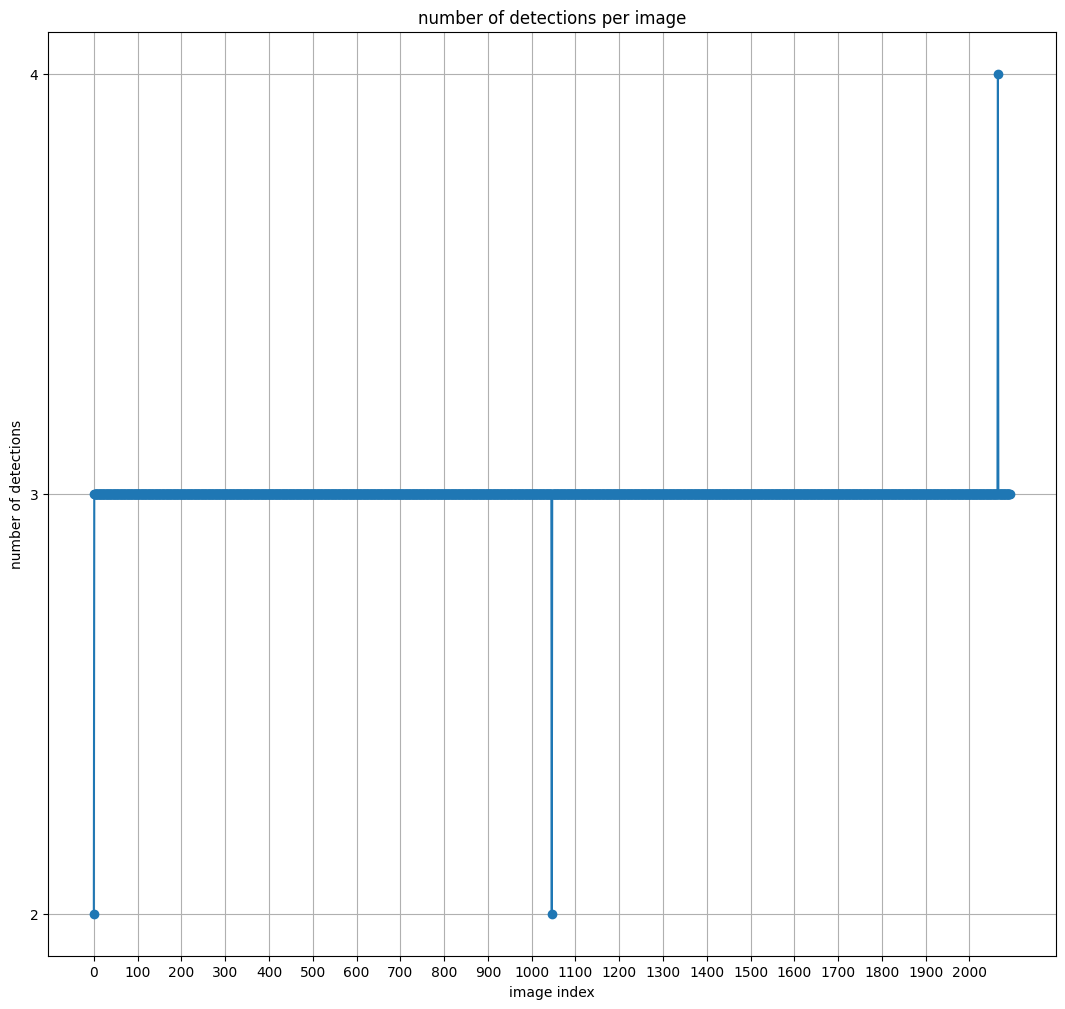

In [ ]:
# This code visualizes the number of detections per image from the `df_detect` DataFrame.
# It highlights images with fewer than 3 detections and plots the total detections per image,
# setting y-axis ticks for 2, 3, 4 detections and x-axis ticks every 100 images.



last_column = df_detect.iloc[:, -1]
filtered_indices = df_detect.index[df_detect.iloc[:, -1] != 3]
filtered_values = df_detect.iloc[filtered_indices, -1]
# Plot erstellen
plt.figure(figsize=(13, 12))
plt.plot(last_column, marker='o', linestyle='-')
plt.title('number of detections per image')
plt.xlabel('image index')
plt.ylabel('number of detections')
plt.yticks([2,3,4])
xticks = range(0, len(df_detect), 100)
plt.xticks(ticks=xticks)

plt.grid(True)
plt.show()

In [ ]:
last_200 = df_detect.iloc[-200:]

# Schritt 2: Filtern, sodass Werte in der letzten Spalte nicht 3 sind
filtered = last_200[last_200.iloc[:, -1] != 3]

# Schritt 3: Zufällig 20 Zeilen auswählen
random_sample = filtered.sample(n=20, random_state=42)  # random_state für Reproduzierbarkeit

print(random_sample)

In [ ]:
# This code iterates over all TIFF images in the training folder, runs YOLO detection on each image,
# counts the number of detections per image, and stores the results in a DataFrame `df_detect_train`.


df_detect_train = pd.DataFrame(columns=["image_file", "total_detections"])
confidence_threshold = 0.5
tif_files = glob.glob(os.path.join("yolo_dataset/train_folder", '*.tif'))
tif_files.sort()
for i, file_path in enumerate(tif_files):
  
    results = model.predict(file_path, conf = 0.3,verbose = False)
    for i, r in enumerate(results):
            # Anzahl der Erkennungen ermitteln
            num_detections = len(r.boxes)
            df_row = pd.DataFrame({"image_file": [file_path], "total_detections": [num_detections]})
            df_detect_train = pd.concat([df_detect_train, df_row], ignore_index=True)
            # Die Ergebnisse als Bild darstellen

In [128]:
print(df_detect_train)

                                             image_file total_detections
0    yolo_dataset/train_folder/final_full_stack0005.tif                3
1    yolo_dataset/train_folder/final_full_stack0009.tif                3
2    yolo_dataset/train_folder/final_full_stack0017.tif                3
3    yolo_dataset/train_folder/final_full_stack0021.tif                3
4    yolo_dataset/train_folder/final_full_stack0030.tif                3
5    yolo_dataset/train_folder/final_full_stack0034.tif                3
6    yolo_dataset/train_folder/final_full_stack0038.tif                3
7    yolo_dataset/train_folder/final_full_stack0042.tif                3
8    yolo_dataset/train_folder/final_full_stack0047.tif                3
9    yolo_dataset/train_folder/final_full_stack0051.tif                3
10   yolo_dataset/train_folder/final_full_stack0055.tif                3
11   yolo_dataset/train_folder/final_full_stack0059.tif                3
12   yolo_dataset/train_folder/final_full_stack0068

In [ ]:
# This code iterates over all TIFF images in the validation folder, runs YOLO detection on each image,
# counts the number of detections per image, and stores the results in a DataFrame `df_detect_val`.


df_detect_val = pd.DataFrame(columns=["image_file", "total_detections"])
confidence_threshold = 0.5
tif_files = glob.glob(os.path.join("yolo_dataset/val_folder", '*.tif'))
tif_files.sort()
for i, file_path in enumerate(tif_files):
  
    results = model.predict(file_path, conf = 0.3,verbose = False)
    for i, r in enumerate(results):
            # Anzahl der Erkennungen ermitteln
            num_detections = len(r.boxes)
            df_row = pd.DataFrame({"image_file": [file_path], "total_detections": [num_detections]})
            df_detect_val  = pd.concat([df_detect_val , df_row], ignore_index=True)
            

In [ ]:
print(df_detect_val)

                                          image_file total_detections
0   yolo_dataset/val_folder/final_full_stack0013.tif                3
1   yolo_dataset/val_folder/final_full_stack0026.tif                3
2   yolo_dataset/val_folder/final_full_stack0114.tif                3
3   yolo_dataset/val_folder/final_full_stack0118.tif                3
4   yolo_dataset/val_folder/final_full_stack0135.tif                3
5   yolo_dataset/val_folder/final_full_stack0151.tif                3
6   yolo_dataset/val_folder/final_full_stack0156.tif                3
7   yolo_dataset/val_folder/final_full_stack0181.tif                3
8   yolo_dataset/val_folder/final_full_stack0202.tif                3
9   yolo_dataset/val_folder/final_full_stack0235.tif                3
10  yolo_dataset/val_folder/final_full_stack0248.tif                3
11  yolo_dataset/val_folder/final_full_stack0260.tif                3
12  yolo_dataset/val_folder/final_full_stack0277.tif                3
13  yolo_dataset/val